### Handwritten digit recognition using SVM

In [1]:
# import all necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#### Data Import

In [2]:
#import file and reading few lines
numbers = pd.read_csv('train.csv')
numbers.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
numbers.shape

(42000, 785)

#### Data understanding and exploration

In [4]:
#checking datatype
numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


All the columns are of dtype - int64.

In [5]:
numbers.describe(percentiles = [0.05,0.10,0.25,0.50,0.75,0.90,0.99])

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
5%,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
10%,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
90%,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [6]:
#checking for null values
round(100*(numbers.isnull().sum()/(len(numbers.index))),2).sort_values(ascending = False)

pixel783    0.0
pixel267    0.0
pixel265    0.0
pixel264    0.0
pixel263    0.0
pixel262    0.0
pixel261    0.0
pixel260    0.0
pixel259    0.0
pixel258    0.0
pixel257    0.0
pixel256    0.0
pixel255    0.0
pixel254    0.0
pixel253    0.0
pixel252    0.0
pixel251    0.0
pixel250    0.0
pixel249    0.0
pixel248    0.0
pixel247    0.0
pixel246    0.0
pixel245    0.0
pixel266    0.0
pixel268    0.0
pixel390    0.0
pixel269    0.0
pixel290    0.0
pixel289    0.0
pixel288    0.0
           ... 
pixel495    0.0
pixel494    0.0
pixel493    0.0
pixel492    0.0
pixel491    0.0
pixel512    0.0
pixel513    0.0
pixel514    0.0
pixel526    0.0
pixel535    0.0
pixel534    0.0
pixel533    0.0
pixel532    0.0
pixel531    0.0
pixel530    0.0
pixel529    0.0
pixel528    0.0
pixel527    0.0
pixel525    0.0
pixel515    0.0
pixel524    0.0
pixel523    0.0
pixel522    0.0
pixel521    0.0
pixel520    0.0
pixel519    0.0
pixel518    0.0
pixel517    0.0
pixel516    0.0
label       0.0
Length: 785, dtype: floa

There are no null values.

#### Column- `Label`

In [7]:
# let us check unique entries of label column
np.unique(numbers['label'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [8]:
numbers['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

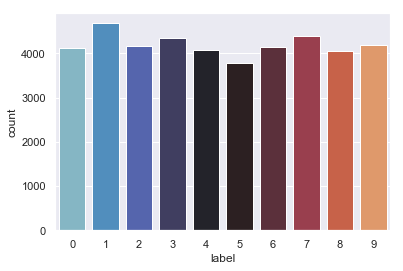

In [9]:
#visualising the column - label
sns.countplot(numbers['label'],palette = 'icefire')

#### Let us examine few `pixels`

Text(0,0.5,'Frequency')

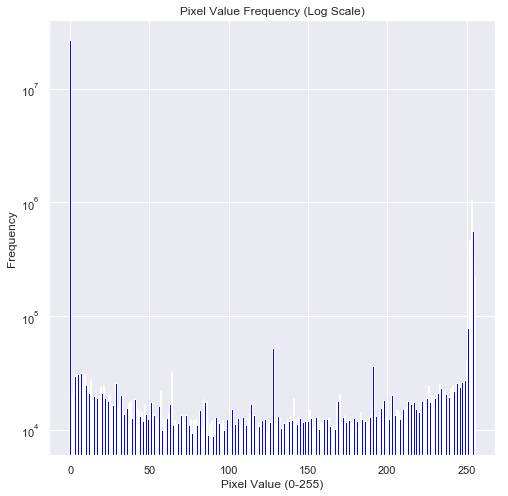

In [10]:
y = pd.value_counts(numbers.values.ravel()).sort_index()
N = len(y)
x = range(N)
width =0.9
plt.figure(figsize=[8,8])
plt.bar(x, y, width, color="blue")
plt.title('Pixel Value Frequency (Log Scale)')
plt.yscale('log')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')

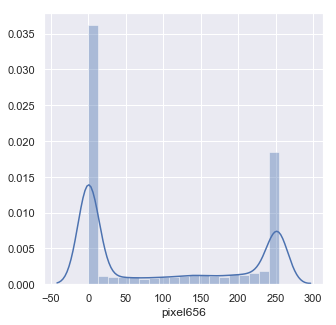

In [11]:
plt.figure(figsize=(5,5))
sns.distplot(numbers['pixel656'])
plt.show()

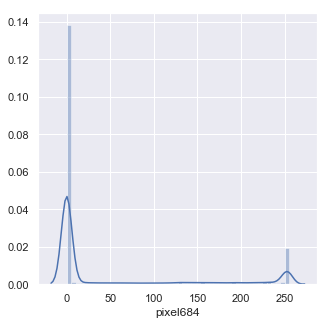

In [12]:
plt.figure(figsize=(5,5))
sns.distplot(numbers['pixel684'])

#### `label` vs `pixel`

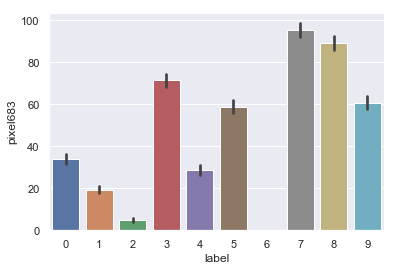

In [13]:
sns.barplot(x='label', y='pixel683', data=numbers)

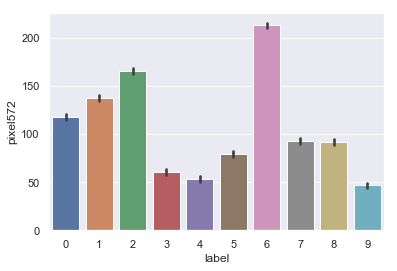

In [14]:
sns.barplot(x='label', y='pixel572', data=numbers)

#### Let us visualize few numbers:

Text(0.5,1,'Digit 1')

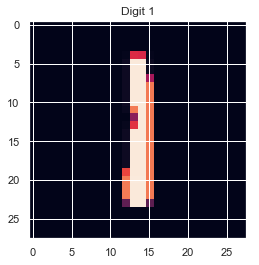

In [15]:
one = numbers.iloc[2, 1:]
one = one.values.reshape(28,28)
plt.imshow(one)
plt.title("Digit 1")

Text(0.5,1,'Digit 0')

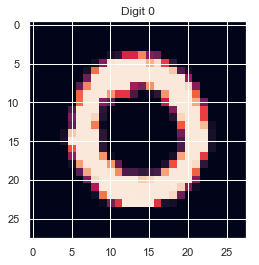

In [16]:
zero = numbers.iloc[1, 1:]
zero = zero.values.reshape(28,28)
plt.imshow(zero)
plt.title("Digit 0")

Text(0.5,1,'Digit 9')

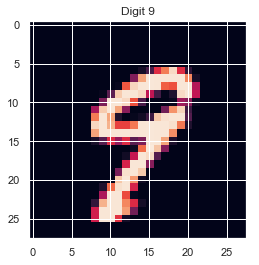

In [17]:
nine = numbers.iloc[11, 1:]
nine = nine.values.reshape(28,28)
plt.imshow(nine)
plt.title("Digit 9")

#### Let us check heatmap

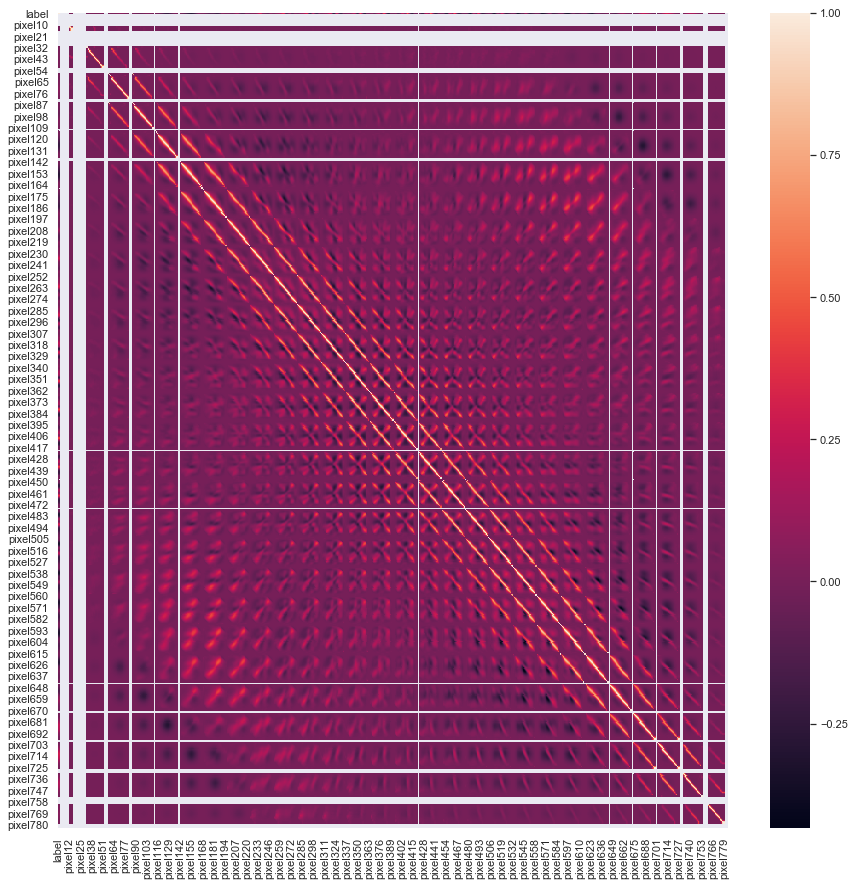

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(data=numbers.corr(),annot=False)

Almost all nearby pixel values are correlated, which is expected as well.

#### Data Preparation

In [19]:
# average feature values
pd.set_option('display.max_rows', 999)
round(numbers.drop('label', axis=1).mean(), 2).sort_values(ascending = False)

pixel407    139.83
pixel435    139.07
pixel408    137.42
pixel434    135.52
pixel211    135.49
pixel210    133.59
pixel602    132.98
pixel212    132.90
pixel436    132.00
pixel601    130.81
pixel380    130.66
pixel406    130.14
pixel409    128.65
pixel381    127.50
pixel463    127.45
pixel575    126.73
pixel603    126.34
pixel209    126.26
pixel629    126.03
pixel462    126.01
pixel213    126.00
pixel574    125.56
pixel183    124.89
pixel379    124.51
pixel237    123.89
pixel238    123.23
pixel433    123.10
pixel628    122.65
pixel600    122.59
pixel240    122.22
pixel239    121.98
pixel184    121.90
pixel630    121.89
pixel241    121.77
pixel437    121.70
pixel464    121.32
pixel236    120.60
pixel182    119.70
pixel576    119.67
pixel547    118.65
pixel353    118.46
pixel548    117.19
pixel573    116.96
pixel242    116.12
pixel491    115.44
pixel461    115.36
pixel405    114.96
pixel352    113.93
pixel627    113.00
pixel208    112.99
pixel214    112.65
pixel492    112.60
pixel519    

We see that average varies between 140 to 0. It is better to scale them.

In [20]:
# splitting into X and y
X = numbers.drop("label", axis = 1)
y = numbers['label']

In [21]:
# scaling the features
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.2,test_size = 0.8, random_state = 101)

In [22]:
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (8400, 784)
y_train shape: (8400,)
X_test shape: (33600, 784)
y_test shape: (33600,)


#### Model Building

1. Let us first try - `Linear` model:

In [23]:
# linear model
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [24]:
# confusion matrix and accuracy, precision, recall

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.913125 

[[3188    0   10    5   11   20   32    3   15    1]
 [   0 3677   14   11    5    7    4    8   30    4]
 [  36   29 3027   54   55   10   30   42   48   12]
 [  13   12  104 3051    9  181    5   21   54   25]
 [   8   14   33    2 3057    4   25   31    6  110]
 [  30   23   29  136   44 2622   44   12   72   27]
 [  26   11   44    4   28   33 3113    0   18    0]
 [   7   24   36   19   59    9    2 3210    4  134]
 [  13   46   50  120   21  110   30   18 2843   21]
 [  19   17   21   22  172   20    4  161   26 2893]]


In [25]:
#precision, recall and f1-score
scores=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

             precision    recall  f1-score   support

          0       0.95      0.97      0.96      3285
          1       0.95      0.98      0.97      3760
          2       0.90      0.91      0.90      3343
          3       0.89      0.88      0.88      3475
          4       0.88      0.93      0.91      3290
          5       0.87      0.86      0.87      3039
          6       0.95      0.95      0.95      3277
          7       0.92      0.92      0.92      3504
          8       0.91      0.87      0.89      3272
          9       0.90      0.86      0.88      3355

avg / total       0.91      0.91      0.91     33600



The linear model gives approx. 91.31% accuracy. Let's look at a non-linear model with randomly chosen hyperparameters.

Let us try `Non- linear` models:

2. `Poly` kernel

In [26]:
# non-linear model
# using poly kernel, C=1, default value of gamma

# model
non_linear_model_poly = SVC(kernel='poly')

# fit
non_linear_model_poly.fit(X_train, y_train)

# predict
y_pred = non_linear_model_poly.predict(X_test)

In [27]:
# confusion matrix and accuracy, precision, recall

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.87125 

[[2893    0    8    3   38   13   28    0  299    3]
 [   1 3684   11    1   12    0    6    0   43    2]
 [  14   18 2489   37  153    1   11   19  588   13]
 [   0   16   24 2846   27   36    3   13  464   46]
 [   3    8   15    0 3080    8    3    5   17  151]
 [   6    1    5   72   73 2358   30    7  442   45]
 [  16    9   10    0  108   43 2901    2  188    0]
 [   1   41    7    7  138    1    0 2862  105  342]
 [   2   16    6   30   20   40    1    4 3131   22]
 [   6   14    1   13  153    8    0   42   88 3030]]


The accuracy dropped to 87.12%, so obviously no point in going with polynomial. Let us try 'rbf'.

3. `rbf` kernel

In [28]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [29]:
# confusion matrix and accuracy, precision, recall

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9396428571428571 

[[3195    0   19    5    4   11   32    4   14    1]
 [   0 3689   23   12    8    3    7    6    8    4]
 [  15   15 3144   29   31    5   18   37   43    6]
 [   5    8   92 3191    5   73    6   31   43   21]
 [   3    7   57    1 3099    9   19   21    7   67]
 [  15   10   37   66   16 2776   53   15   32   19]
 [  19    5   46    1   12   31 3149    2   12    0]
 [   6   21   66   11   25    3    0 3285    3   84]
 [  14   24   40   63   14   62   22   19 2996   18]
 [  12   10   38   40   80    6    0   97   24 3048]]


In [30]:
#precision, recall and f1-score
scores=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

             precision    recall  f1-score   support

          0       0.97      0.97      0.97      3285
          1       0.97      0.98      0.98      3760
          2       0.88      0.94      0.91      3343
          3       0.93      0.92      0.93      3475
          4       0.94      0.94      0.94      3290
          5       0.93      0.91      0.92      3039
          6       0.95      0.96      0.96      3277
          7       0.93      0.94      0.94      3504
          8       0.94      0.92      0.93      3272
          9       0.93      0.91      0.92      3355

avg / total       0.94      0.94      0.94     33600



As we clearly see that the non-linear `rbf` model gives approx. 94% accuracy. And most of the precision is above 90%.Thus, going forward, let's choose hyperparameters corresponding to non-linear `rbf` models.

#### Grid Search: Hyperparameter Tuning

In [31]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [0.01, 0.001,0.0001],
                     'C': [1, 10, 100]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,n_jobs = -1)      

# fit the model
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 48.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [32]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,230.289372,14.924020,29.271274,1.360375,1,0.01,"{'C': 1, 'gamma': 0.01}",0.752381,0.750595,0.747024,...,0.741310,0.010784,9,1.000000,0.999851,0.999851,1.000000,1.000000,0.999940,0.000073
1,57.797906,1.532890,16.758559,0.176419,1,0.001,"{'C': 1, 'gamma': 0.001}",0.935119,0.926786,0.935119,...,0.930833,0.004216,3,0.972321,0.971429,0.971429,0.972173,0.973214,0.972113,0.000663
2,87.355196,11.132752,22.471885,0.943942,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.910119,0.905952,0.907738,...,0.903095,0.006075,6,0.916518,0.917708,0.916518,0.921577,0.919940,0.918452,0.002001
3,266.704655,6.880410,34.095550,3.464144,10,0.01,"{'C': 10, 'gamma': 0.01}",0.766071,0.772619,0.765476,...,0.760476,0.009705,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,56.054606,2.113388,18.376451,2.488655,10,0.001,"{'C': 10, 'gamma': 0.001}",0.941071,0.938690,0.945833,...,0.939405,0.003865,1,0.999405,0.999554,0.999405,0.999107,0.999256,0.999345,0.000152
5,48.603580,5.898477,18.548261,1.929712,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.933929,0.923214,0.931548,...,0.927262,0.004678,4,0.957887,0.959970,0.959375,0.957738,0.959077,0.958810,0.000865
6,312.175455,33.263280,38.243987,1.712440,100,0.01,"{'C': 100, 'gamma': 0.01}",0.766071,0.772619,0.765476,...,0.760476,0.009705,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,67.308850,8.019266,23.858565,6.180171,100,0.001,"{'C': 100, 'gamma': 0.001}",0.939881,0.936905,0.946429,...,0.939286,0.003783,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,34.057548,2.200574,12.538917,0.988541,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.929762,0.923810,0.925595,...,0.925595,0.003409,5,0.994345,0.994494,0.994940,0.993006,0.994196,0.994196,0.000645


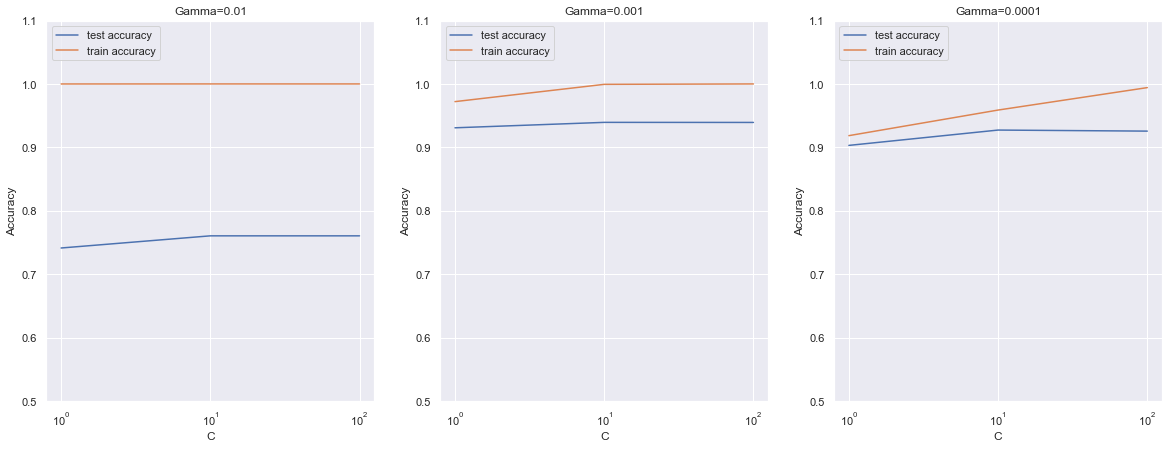

In [33]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(20,7))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.50, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.50, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.50, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [34]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9394047619047619 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


Let us take the best value ({'C': 10, 'gamma': 0.001}) as suggested by the sklearn.

#### Building and Evaluating the Final Model

In [35]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9477083333333334 

[[3211    0   19    2    2   12   26    3    8    2]
 [   0 3692   26    9    6    3    5    9    7    3]
 [  13   12 3165   29   29    6   20   40   21    8]
 [   4    5   77 3232    4   79    1   23   31   19]
 [   5    8   42    1 3117    5   20   19    9   64]
 [  15    8   33   61   15 2815   35   11   31   15]
 [  19    5   44    1   12   18 3167    1   10    0]
 [   5   17   52   12   29    4    1 3322    4   58]
 [   7   16   42   53   15   51   18   16 3044   10]
 [   9    9   33   20   81   10    0   94   21 3078]] 



In [36]:
# different class-wise accuracy - #precision, recall and f1-score
scores=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

             precision    recall  f1-score   support

          0       0.98      0.98      0.98      3285
          1       0.98      0.98      0.98      3760
          2       0.90      0.95      0.92      3343
          3       0.95      0.93      0.94      3475
          4       0.94      0.95      0.94      3290
          5       0.94      0.93      0.93      3039
          6       0.96      0.97      0.96      3277
          7       0.94      0.95      0.94      3504
          8       0.96      0.93      0.94      3272
          9       0.95      0.92      0.93      3355

avg / total       0.95      0.95      0.95     33600



We see that with hyperparameter - C = 10 and gamma = 0.001, we see overall accuracy of the model is 95% and also precision for each label is above 94%.

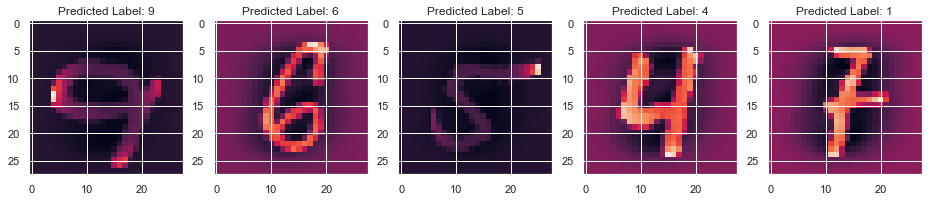

In [37]:
# Let us visualize our final model on unseen training dataset

df = np.random.randint(1,y_pred.shape[0]+1,5)

plt.figure(figsize=(16,4))
for i,j in enumerate(df):
    plt.subplot(150+i+1)
    d = X_test[j].reshape(28,28)
    plt.title(f'Predicted Label: {y_pred[j]}')
    plt.imshow(d)
plt.show()

#### Let us use our final model on test data (test.csv)

In [38]:
#import file and reading few lines
test_df = pd.read_csv('test.csv')
test_df.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
test_df.shape

(28000, 784)

In [40]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [41]:
# scaling the features
test_scaled = scale(test_df)

In [42]:
#model.predict
test_predict = model.predict(test_scaled)

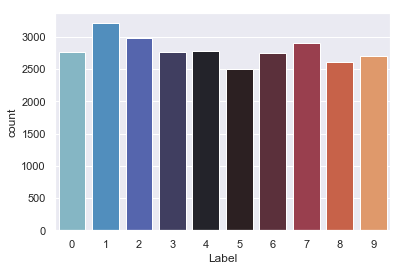

In [43]:
# Plotting the distribution of prediction
a = {'ImageId': np.arange(1,test_predict.shape[0]+1), 'Label': test_predict}
data_to_export = pd.DataFrame(a)
sns.countplot(data_to_export['Label'], palette = 'icefire')

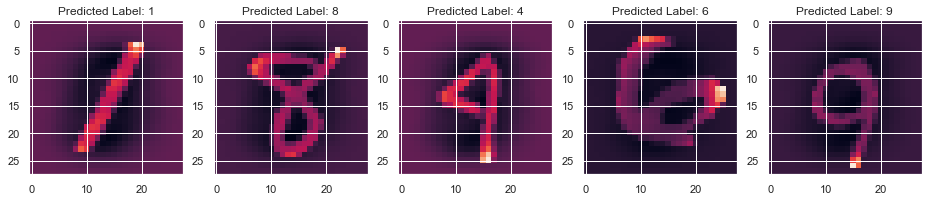

In [44]:
# Let us visualize few of predicted test numbers

df = np.random.randint(1,test_predict.shape[0]+1,5)

plt.figure(figsize=(16,4))
for i,j in enumerate(df):
    plt.subplot(150+i+1)
    d = test_scaled[j].reshape(28,28)
    plt.title(f'Predicted Label: {test_predict[j]}')
    plt.imshow(d)
plt.show()

In [45]:
# Exporting the predicted values 
data_to_export.to_csv(path_or_buf='submission.csv', index=False)